### Import modules

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import qrcode
import fillingpatterns as fp

sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 0.2, "grid.linewidth": 0.1})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

%config InlineBackend.figure_format='svg'

# Define study
STUDY_NAME = "opt_flathv_75_1500_withBB_chroma15_1p4_custom_filling"

## Function to add QR code to plot

In [2]:
# To add QR codes to plot
def add_QR_code(fig, link):
    # Add QR code pointing to the github repository
    qr = qrcode.QRCode(
        # version=None,
        box_size=10,
        border=1,
    )
    qr.add_data(link)
    qr.make(fit=False)
    im = qr.make_image(fill_color="black", back_color="transparent")
    newax = fig.add_axes([0.9, 0.9, 0.05, 0.05], anchor="NE", zorder=1)
    newax.imshow(im, resample=False, interpolation="none", filternorm=False)
    # Add link below qrcode
    newax.plot([0, 0], [0, 0], color="white", label="link")
    text = newax.annotate(
        "lin",
        xy=(0, 300),
        xytext=(0, 300),
        fontsize=30,
        url=link,
        bbox=dict(color="white", alpha=1e-6, url=link),
        alpha=0,
    )
    # Hide X and Y axes label marks
    newax.xaxis.set_tick_params(labelbottom=False)
    newax.yaxis.set_tick_params(labelleft=False)
    # Hide X and Y axes tick marks
    newax.set_xticks([])
    newax.set_yticks([])
    newax.set_axis_off()

    return fig

### Load data

In [3]:
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

df

,,normalized amplitude in xy-plane,on_x1,on_x5,qx,qy,dqx,dqy,i_oct_b1,i_oct_b2,i_bunch_b1,i_bunch_b2
i_bunch_b1,i_bunch_b2,,,,,,,,,,,
692,1586,7.375,250.0,250.0,62.316,60.321,15.0,15.0,60.0,60.0,692.0,1586.0
693,1586,7.250,250.0,250.0,62.316,60.321,15.0,15.0,60.0,60.0,693.0,1586.0
694,1586,7.438,250.0,250.0,62.316,60.321,15.0,15.0,60.0,60.0,694.0,1586.0
695,1586,7.031,250.0,250.0,62.316,60.321,15.0,15.0,60.0,60.0,695.0,1586.0
696,1586,7.094,250.0,250.0,62.316,60.321,15.0,15.0,60.0,60.0,696.0,1586.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2528,1586,6.156,250.0,250.0,62.316,60.321,15.0,15.0,60.0,60.0,2528.0,1586.0
2529,1586,6.125,250.0,250.0,62.316,60.321,15.0,15.0,60.0,60.0,2529.0,1586.0
2530,1586,5.969,250.0,250.0,62.316,60.321,15.0,15.0,60.0,60.0,2530.0,1586.0


### Get beam schedule

In [11]:
patt = fp.FillingPattern.from_json('../../../master_study/master_jobs/filling_scheme/custom_schemes/56B_filling_scheme_Colas_B2_2.json')
patt.compute_beam_beam_schedule(n_lr_per_side=26)

sched_b1 = patt.b1.bb_schedule
sched_b2 = patt.b2.bb_schedule

# ! All trains have been shifted in the debuggued file Matteo sent me
# 1st train in new file is actually 3rd train in old file
# 2nd train in new file is actually 1st train in old file
# 3rd train in new file is actually 2nd train in old file

Computing collision schedules...
Done Beam 1
Done Beam 2


### Plot the DA of the three trains of bunches

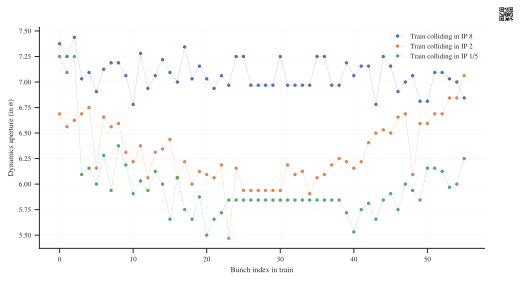

In [6]:
# Separate df in three groups according to the discontinuity in i_bunch_b1
df_train_1 = df[df["i_bunch_b1"] < 1000]
df_train_2 = df[(df["i_bunch_b1"] >= 1000) & (df["i_bunch_b1"] < 2000)]
df_train_3 = df[df["i_bunch_b1"] >= 2000]

# Reindex all trains so that they start from 0
df_train_1 = df_train_1.reset_index(drop=True)
df_train_2 = df_train_2.reset_index(drop=True)
df_train_3 = df_train_3.reset_index(drop=True)

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(df_train_1.index, df_train_1["normalized amplitude in xy-plane"], '--.', label = "Train colliding in IP 8")
plt.plot(df_train_2.index, df_train_2["normalized amplitude in xy-plane"], '--.', label = "Train colliding in IP 2")
plt.plot(df_train_3.index, df_train_3["normalized amplitude in xy-plane"], '--.', label = "Train colliding in IP 1/5")
plt.xlabel("Bunch index in train")
plt.ylabel("Dynamics aperture (in " + r"$\sigma$" + ")")
plt.grid()
plt.legend(frameon=False, loc = "upper right")
# Add QR code
link = "TO ADD"
fig = add_QR_code(fig, link)

# Display and save
plt.savefig("plots/output_" + STUDY_NAME + ".png", bbox_inches="tight")
plt.show()
